In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df = pd.DataFrame(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.dropna(inplace = True)

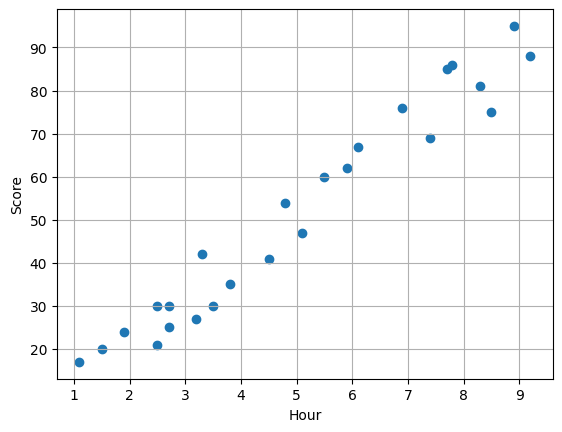

In [7]:
plt.scatter(df["Hours"], df["Scores"])
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Score")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn import metrics

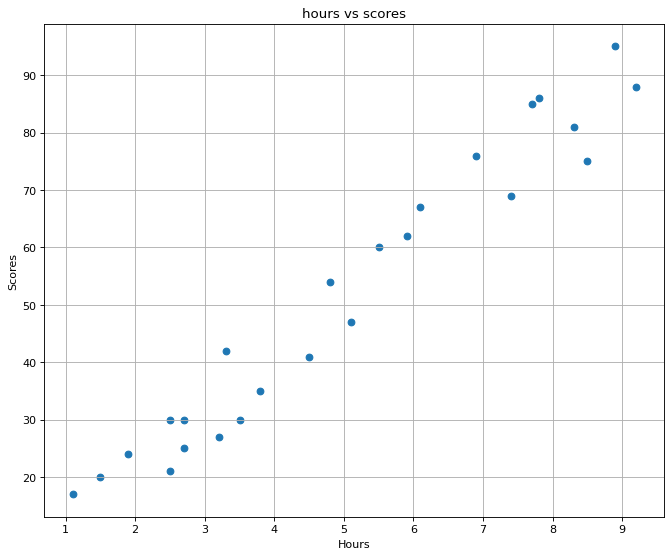

In [11]:
plt.figure(figsize=(10,8), dpi = 80)
plt.scatter(df["Hours"], df["Scores"])
plt.grid()
plt.title("hours vs scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

                

In [12]:
x = df["Hours"].values.reshape(-1,1)
y = df["Scores"].values.reshape(-1,1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [14]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(x_test)

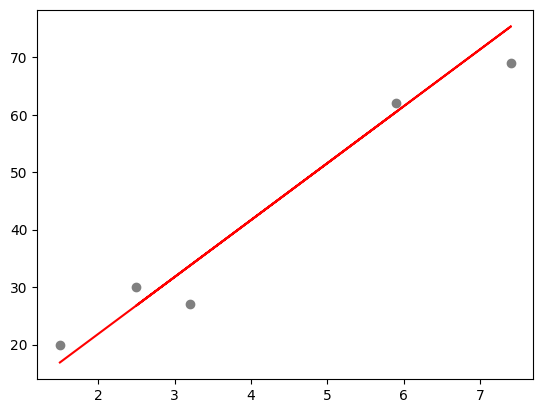

In [16]:
plt.scatter(x_test, y_test, color="gray")
plt.plot(x_test,y_pred, color="red")
plt.show()

In [17]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.598769307217406
Root Mean Squared Error:  4.647447612100367
R2 Score:  0.9454906892105355


In [18]:
compare = pd.DataFrame({"Actual":y_test.flatten(), "Predicted":y_pred.flatten()})
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
accuracy = regressor.score(x_test, y_test)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9454906892105355


In [22]:
hours = 9.5
predicted_score = regressor.predict(np.array([[hours]]))
print(f"Predicted Score for studying {hours} hours: {predicted_score[0][0]}")

Predicted Score for studying 9.5 hours: 96.16939660753592
